<a href="https://colab.research.google.com/github/Ganeshv2002/My-Data-Science-Projects/blob/main/LSTM_Based_Stock_Market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essentials of Data Analytics Project  
# LSTM Based Stock Market Analysis


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.7 MB/s eta 0:00:00


In [ ]:
!pip install yfinance joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

company_list =[]
company_name =[]

# Set up End and Start times for data grab
tech_list = ['TATAMOTORS.NS', 'M&M.NS', 'MARUTI.NS', 'EICHERMOT.NS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
df = pd.DataFrame()
for stock in tech_list:
    print(stock)
    d = yf.download(stock, start, end)
    d["company_name"] = stock
    company_list.append(d)
    company_name.append(stock)
    df = pd.concat([df,d])
    vars()[stock] = d
    # print(vars()[stock])
df

TATAMOTORS.NS
[*********************100%***********************]  1 of 1 completed
M&M.NS
[*********************100%***********************]  1 of 1 completed
MARUTI.NS
[*********************100%***********************]  1 of 1 completed
EICHERMOT.NS
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-21,444.500000,449.350006,441.049988,448.049988,448.049988,14124872,TATAMOTORS.NS
2022-04-22,442.049988,447.250000,438.000000,438.850006,438.850006,14362036,TATAMOTORS.NS
2022-04-25,432.750000,436.000000,423.149994,425.149994,425.149994,14729009,TATAMOTORS.NS
2022-04-26,433.899994,437.450012,431.600006,434.899994,434.899994,13577513,TATAMOTORS.NS
2022-04-27,429.250000,432.950012,425.100006,430.250000,430.250000,13701069,TATAMOTORS.NS
...,...,...,...,...,...,...,...
2023-04-12,3035.000000,3145.000000,3035.000000,3128.350098,3128.350098,746284,EICHERMOT.NS
2023-04-13,3140.000000,3231.449951,3132.000000,3213.050049,3213.050049,1337741,EICHERMOT.NS
2023-04-17,3235.000000,3254.000000,3206.000000,3229.000000,3229.000000,539975,EICHERMOT.NS


In [ ]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,3334.079705,3369.325910,3295.015984,3330.971558,3324.996991,4.810859e+06
std,3186.153012,3215.267177,3152.635721,3182.542033,3177.418451,7.318092e+06
min,380.250000,384.649994,366.200012,372.299988,372.299988,3.005200e+04
25%,782.574989,790.349998,761.325012,771.400002,764.827248,5.558192e+05
50%,1868.100037,1883.724976,1836.599976,1866.150024,1858.400757,1.495302e+06
75%,4706.487427,4743.574951,4584.087524,4663.325012,4651.711731,6.895552e+06
max,9650.000000,9769.000000,9451.099609,9527.599609,9527.599609,7.142575e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2022-04-21 to 2023-04-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          988 non-null    float64
 1   High          988 non-null    float64
 2   Low           988 non-null    float64
 3   Close         988 non-null    float64
 4   Adj Close     988 non-null    float64
 5   Volume        988 non-null    int64  
 6   company_name  988 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 61.8+ KB


##VISUALIZATIONS

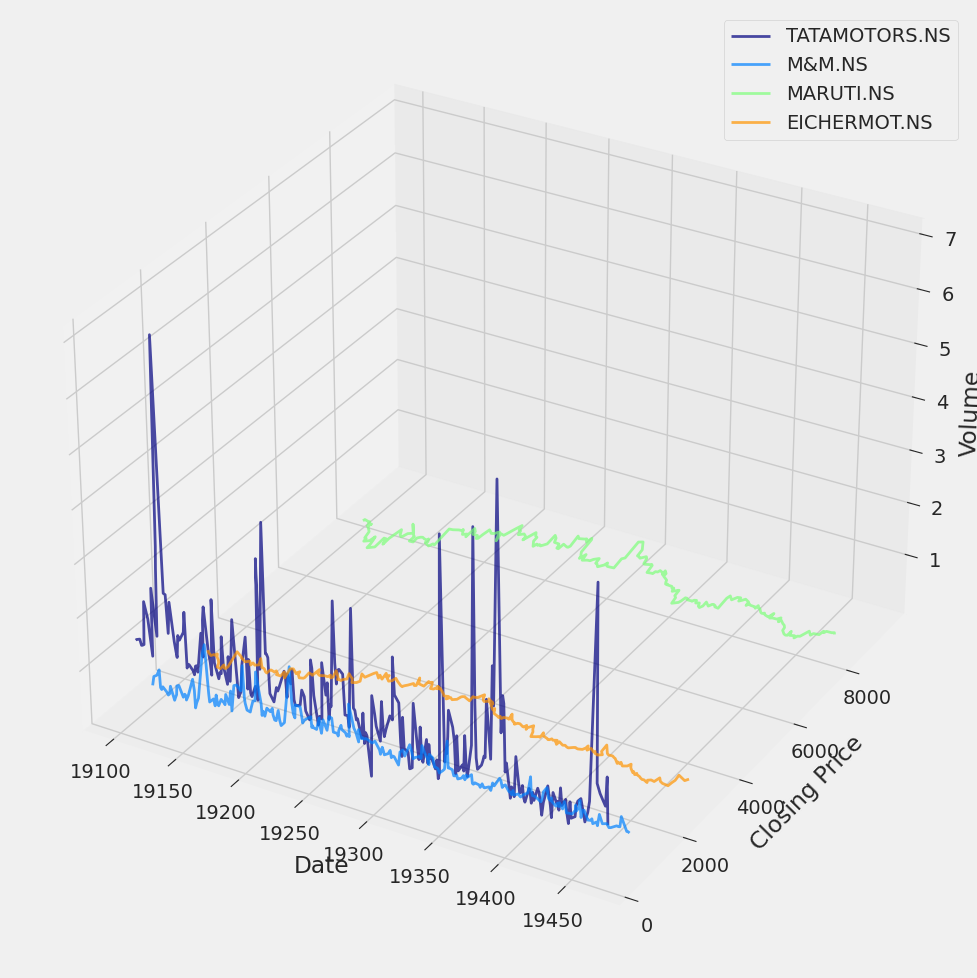

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for i, company in enumerate(company_list):
    x = mdates.date2num(company.index)
    y = company['Adj Close']
    z = company['Volume']
    ax.plot(x, y, z, label=tech_list[i], linewidth=2, alpha=0.7, color=cm.jet(i/len(company_list)))

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_zlabel('Volume')
ax.legend()

plt.tight_layout()


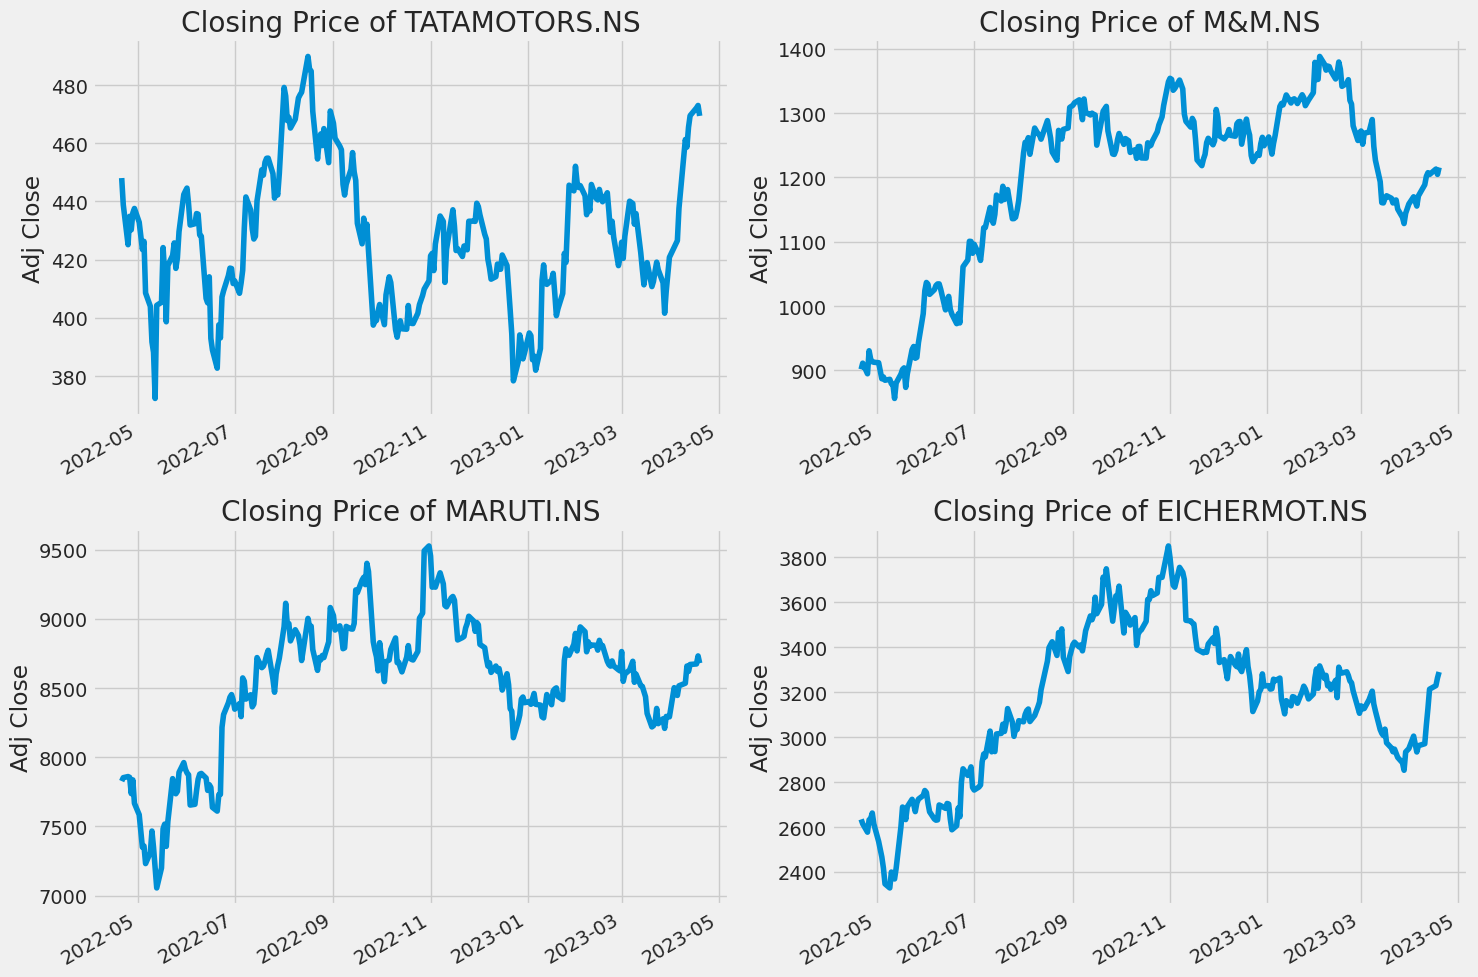

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

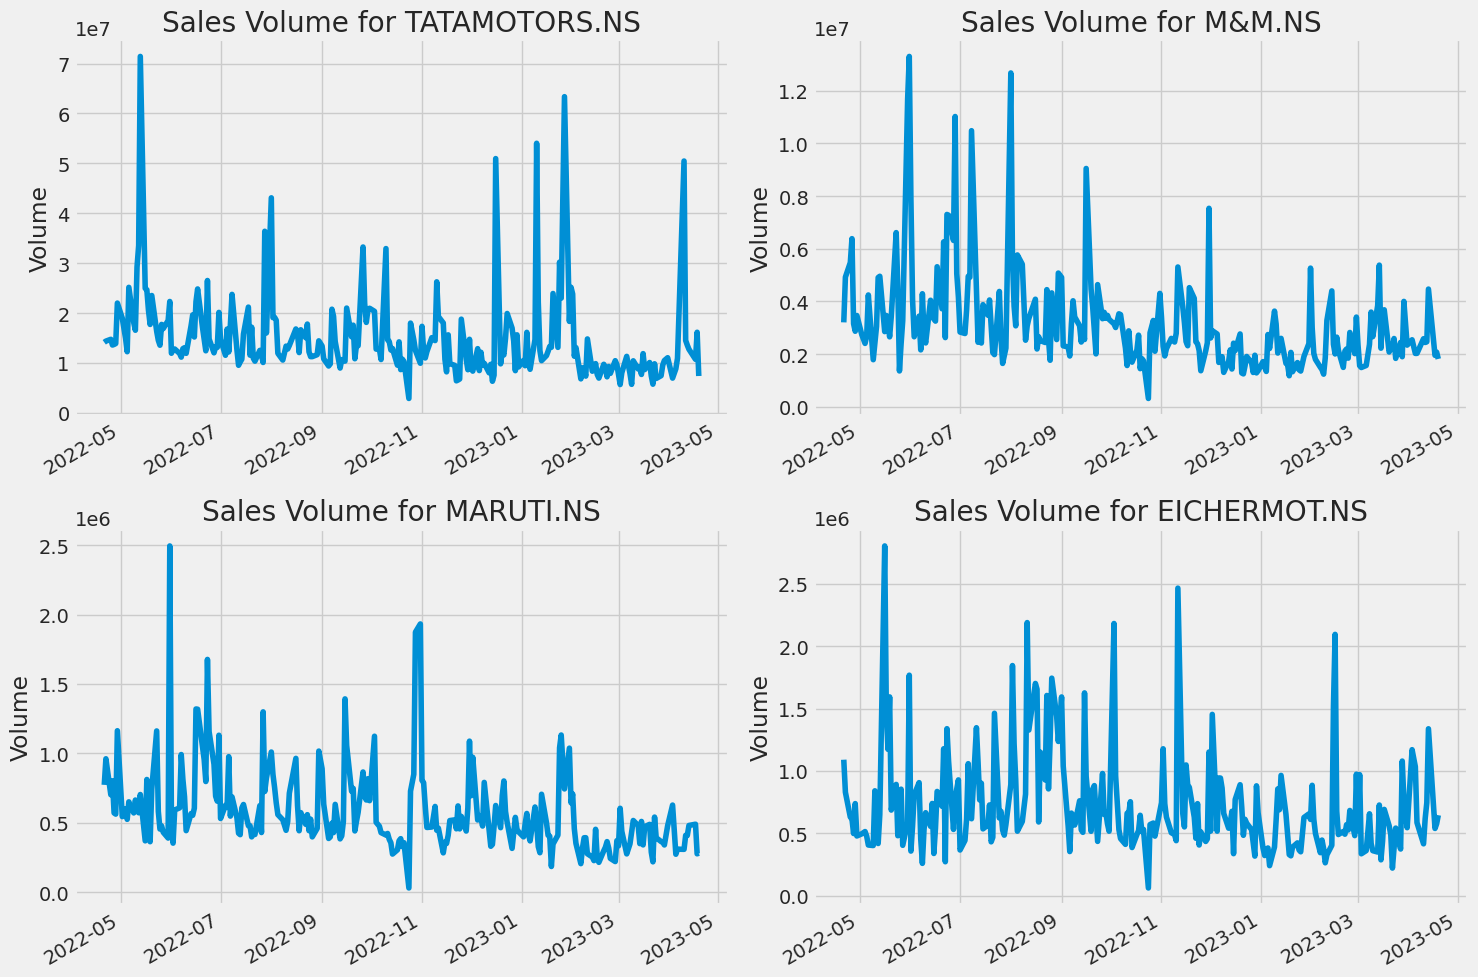

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

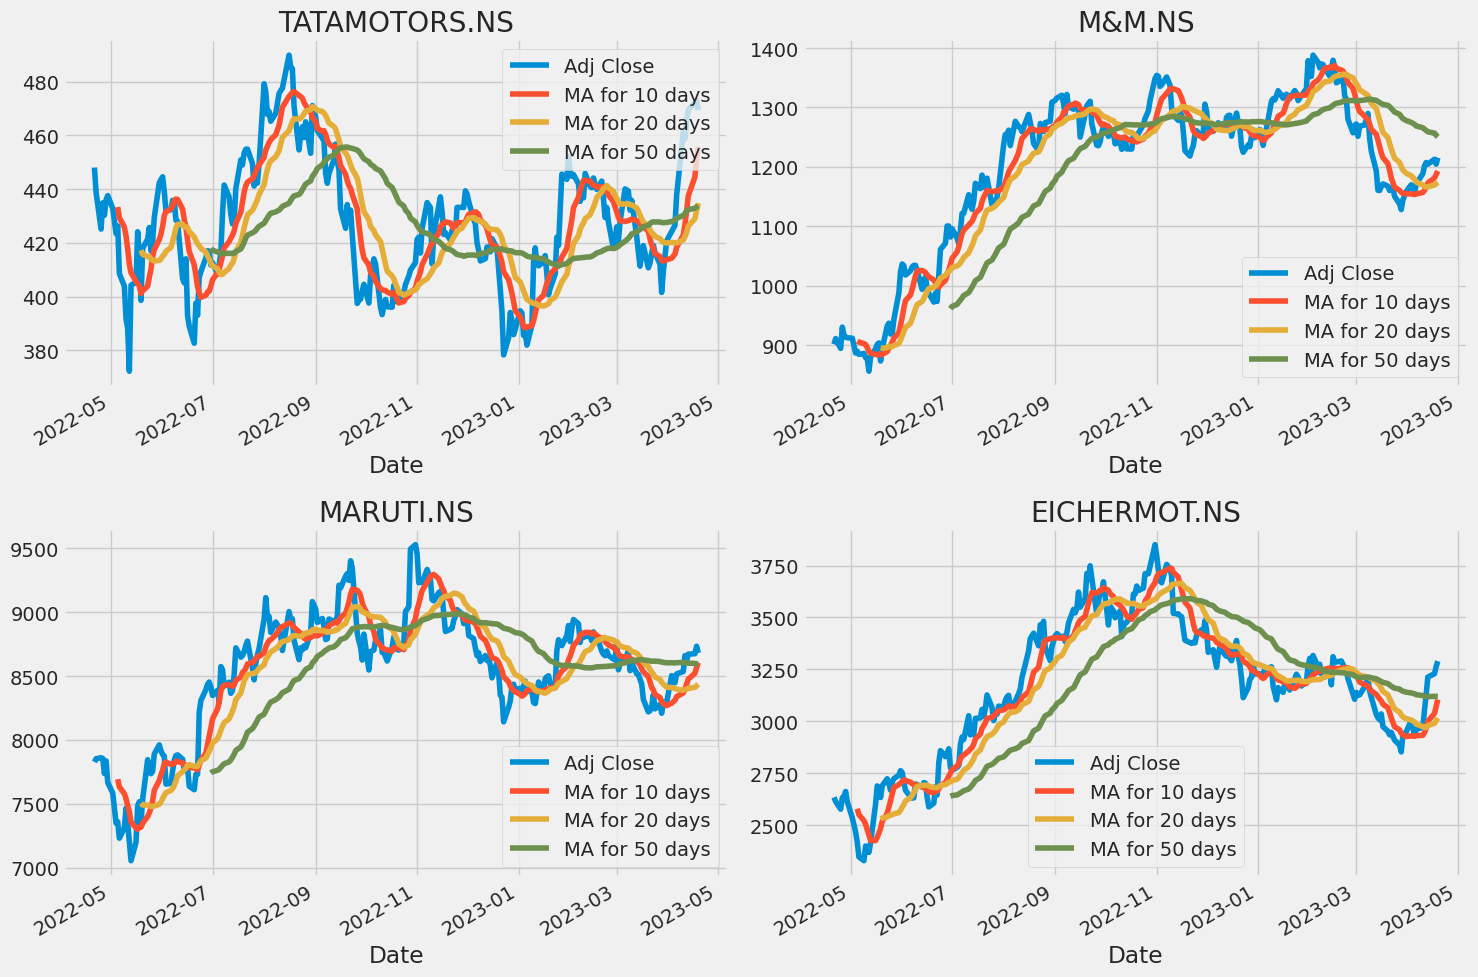

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        # print(company)
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        # print(vars()[stock])

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
j=0
for i in company_name:
  vars()[i][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[j//2,j%2])
  axes[j//2,j%2].set_title(i)
  j+=1
fig.tight_layout()

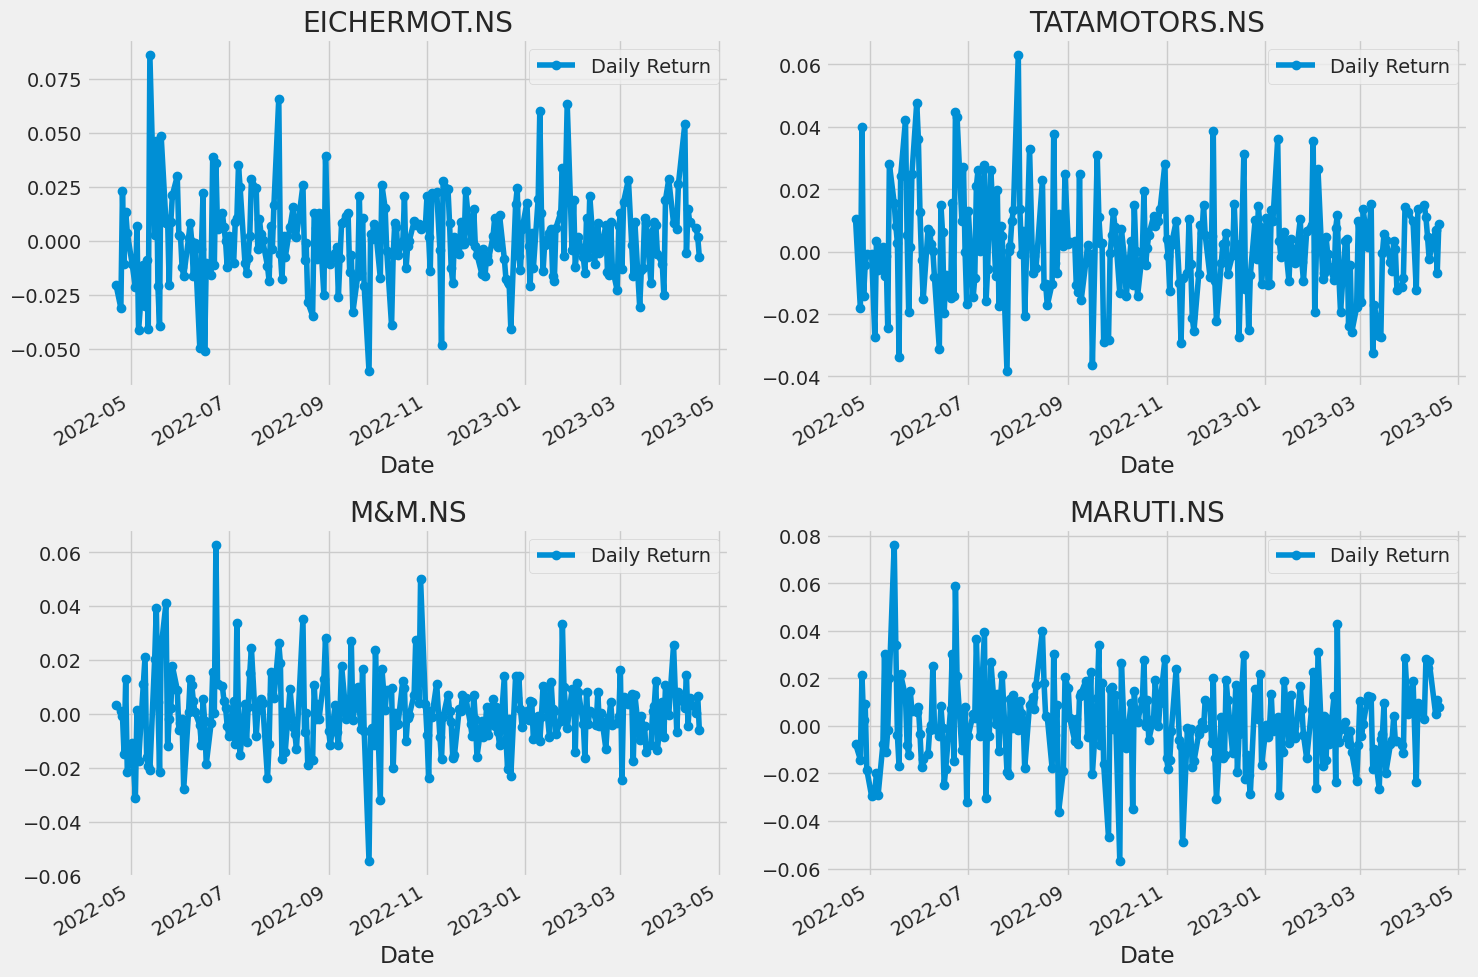

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

j=0
for company in company_list:
  company['Daily Return'].plot(ax=axes[j//2,j%2], legend=True, linestyle='-', marker='o')
  axes[j//2,j%2].set_title(f'{company_name[j - 1]}')
  j+=1

fig.tight_layout()

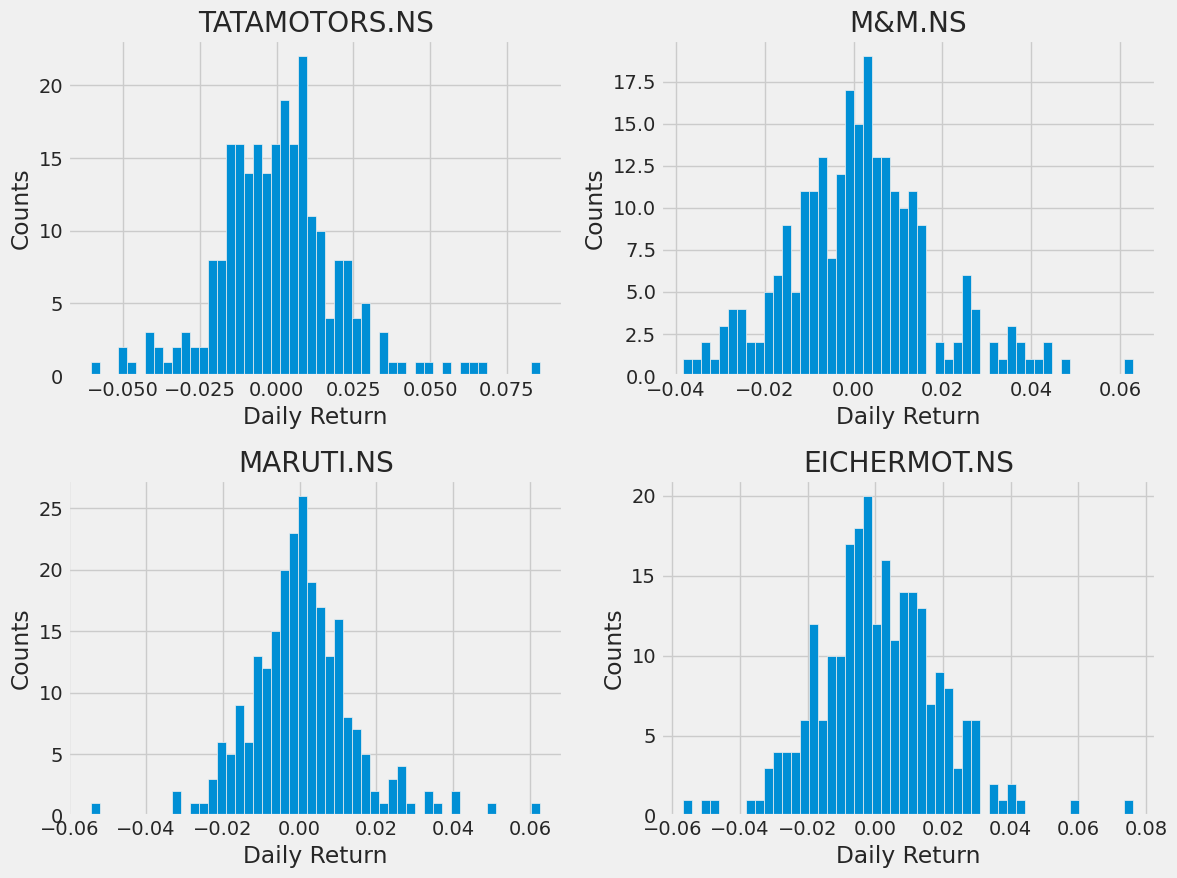

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets

[*********************100%***********************]  4 of 4 completed


,EICHERMOT.NS,M&M.NS,MARUTI.NS,TATAMOTORS.NS
Date,,,,
2022-04-21,NaN,NaN,NaN,NaN
2022-04-22,-0.007543,0.010593,0.003211,-0.020533
2022-04-25,-0.014194,-0.018085,0.000993,-0.031218
2022-04-26,0.021259,0.039989,-0.000708,0.022933
2022-04-27,0.002321,-0.014147,-0.014968,-0.010692
...,...,...,...,...
2023-04-12,0.024278,0.004702,-0.004446,0.014824
2023-04-13,0.027075,-0.002319,0.005771,0.008593
2023-04-17,0.004964,0.006973,0.000444,0.005644


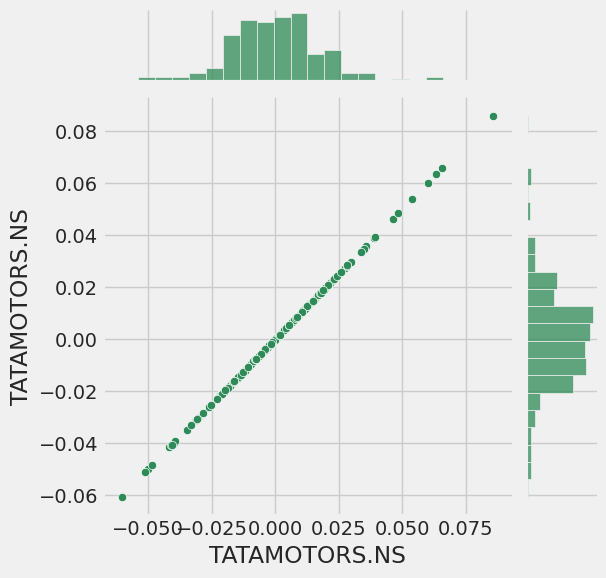

In [ ]:
# Comparing Tatamotors to itself should show a perfectly linear relationship
sns.jointplot(x='TATAMOTORS.NS', y='TATAMOTORS.NS', data=tech_rets, kind='scatter', color='seagreen')

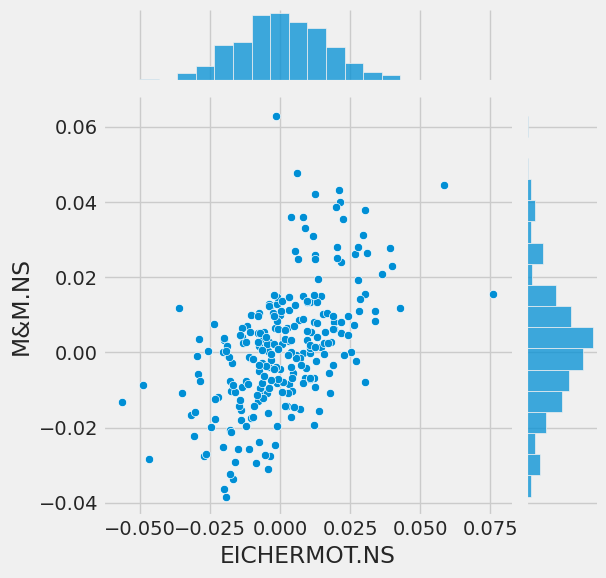

In [ ]:
# We'll use joinplot to compare the daily returns of EICHERMOT and M&M
sns.jointplot(x='EICHERMOT.NS', y='M&M.NS', data=tech_rets, kind='scatter')

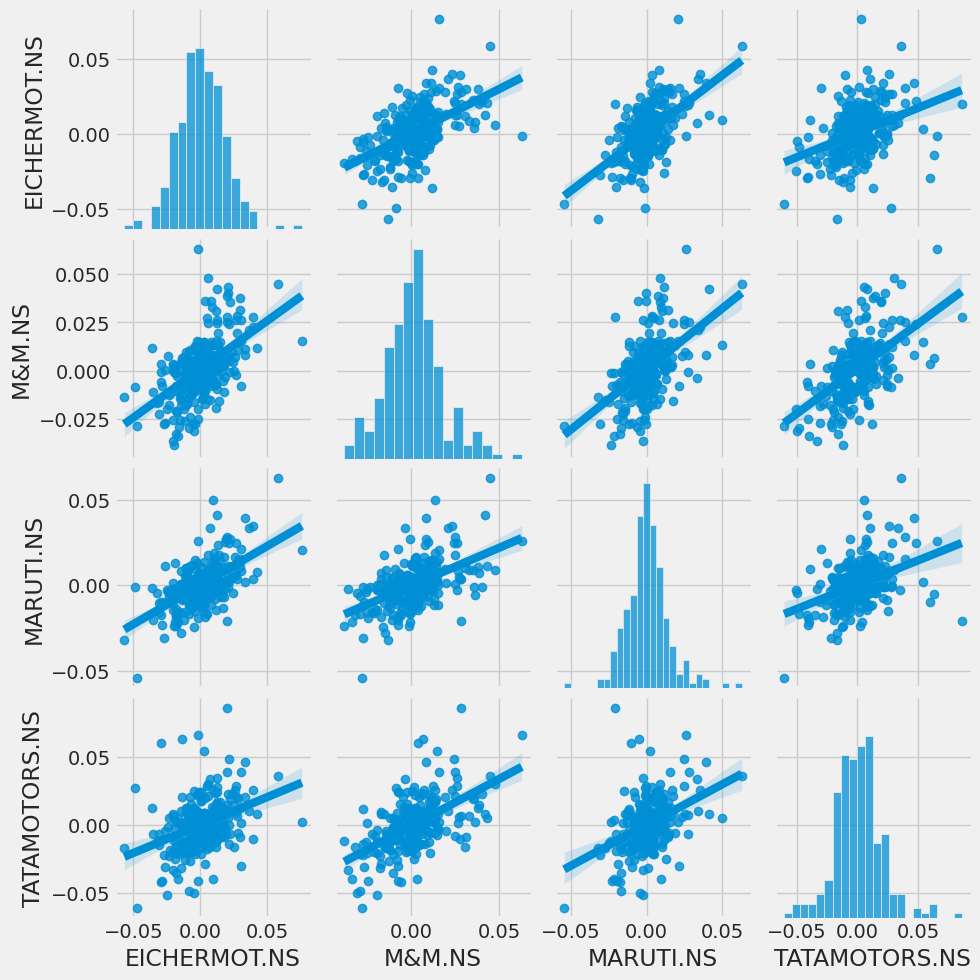

In [ ]:
sns.pairplot(tech_rets, kind='reg')

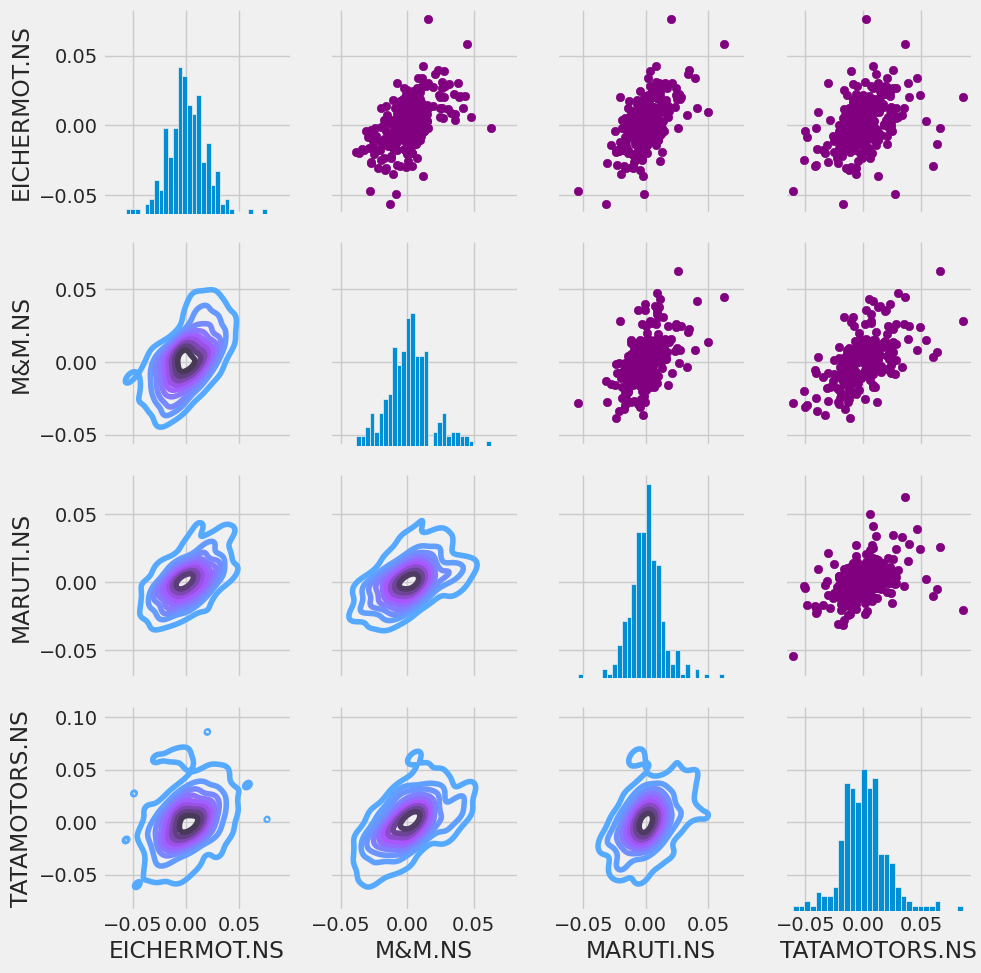

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

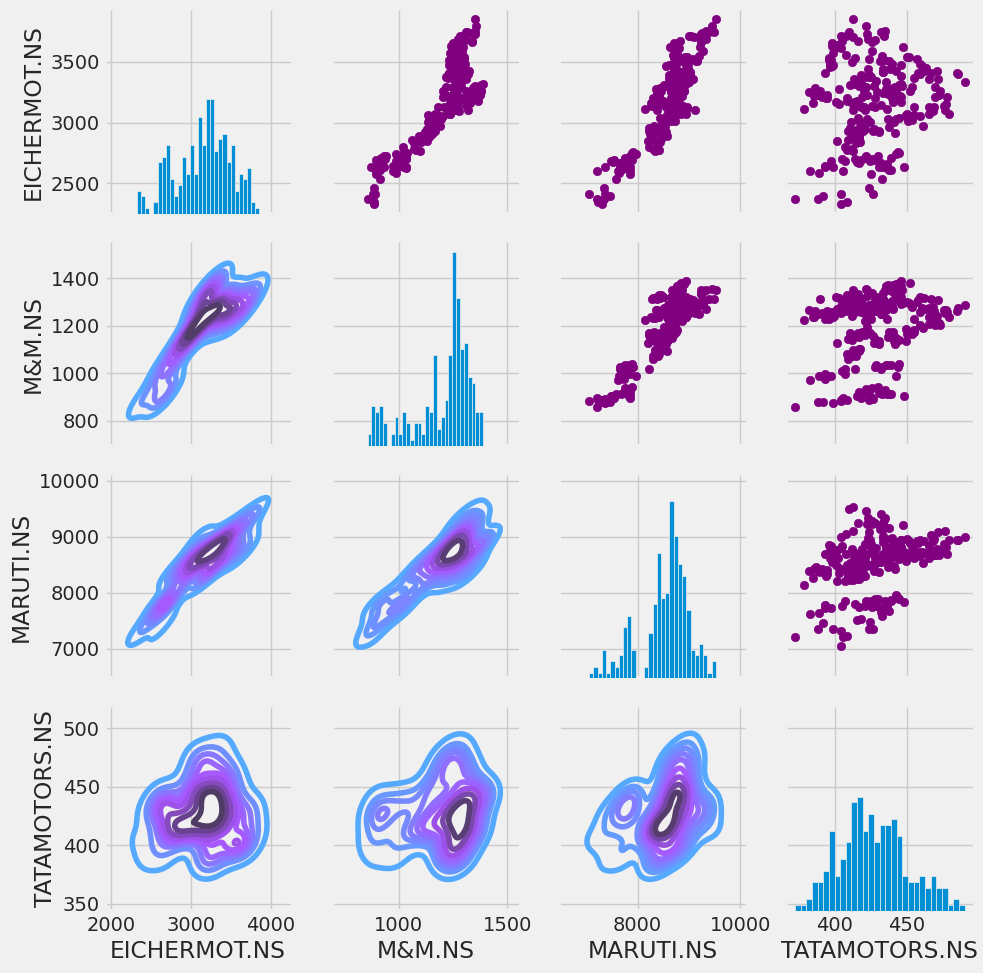

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

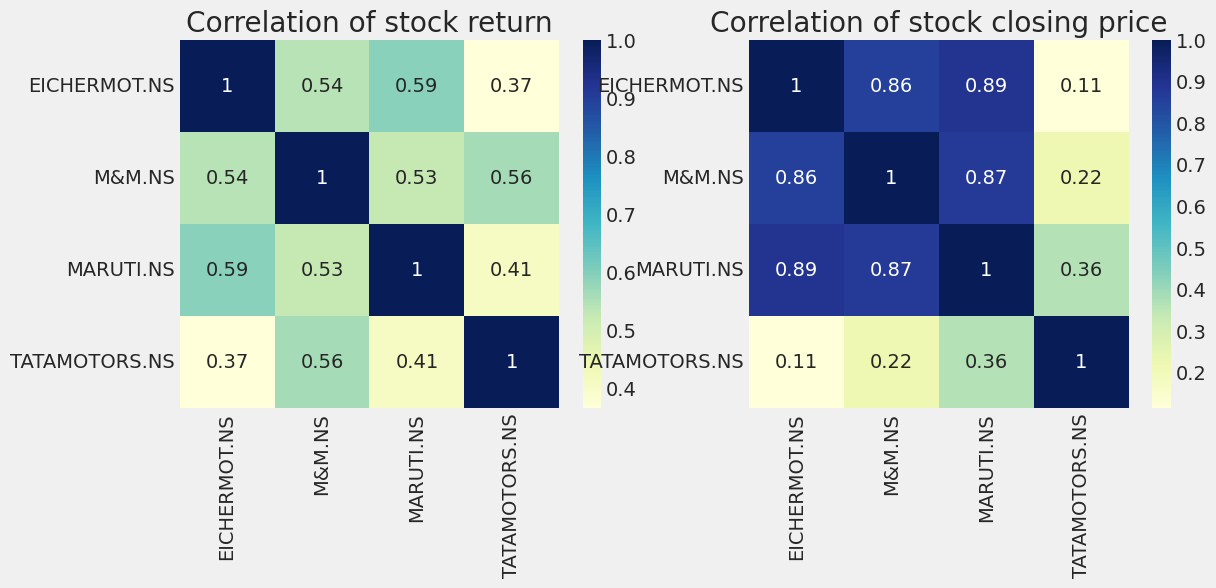

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of stock closing price')

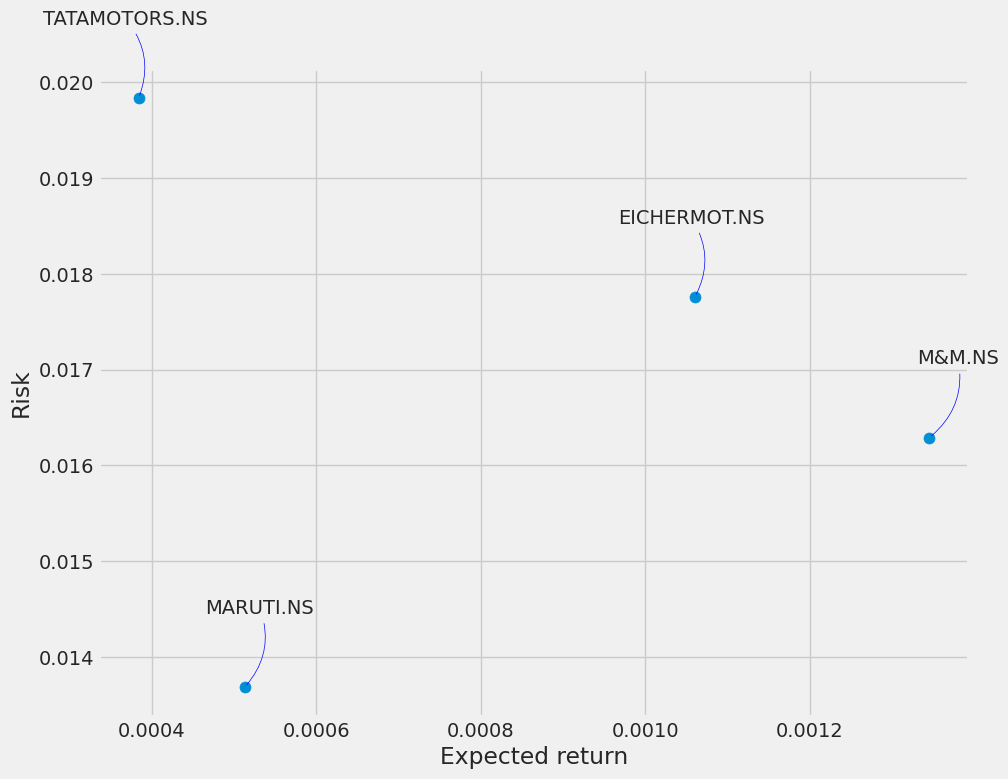

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

##PREDICTION USING MACHINE LEARNING MODELS

In [ ]:
# Get the stock quote
# df = pdr.get_data_yahoo('TATAMOTORS.NS',  start = '2012-1-1', end = datetime.today())
df = pdr.get_data_yahoo('TATAMOTORS.NS',  period = '7d', interval = '1m')
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-12 09:15:00+05:30,458.850006,459.899994,458.500000,458.500000,458.500000,0
2023-04-12 09:16:00+05:30,458.600006,459.500000,458.500000,459.500000,459.500000,83580
2023-04-12 09:17:00+05:30,459.299988,460.799988,459.250000,460.799988,460.799988,112638
2023-04-12 09:18:00+05:30,460.799988,461.299988,460.399994,460.799988,460.799988,152214
2023-04-12 09:19:00+05:30,460.700012,461.200012,460.250000,461.000000,461.000000,63746
...,...,...,...,...,...,...
2023-04-21 13:23:00+05:30,468.700012,469.200012,468.600006,469.200012,469.200012,17129
2023-04-21 13:24:00+05:30,469.200012,469.200012,468.750000,468.799988,468.799988,17827
2023-04-21 13:25:00+05:30,468.950012,469.100006,468.799988,469.000000,469.000000,14889


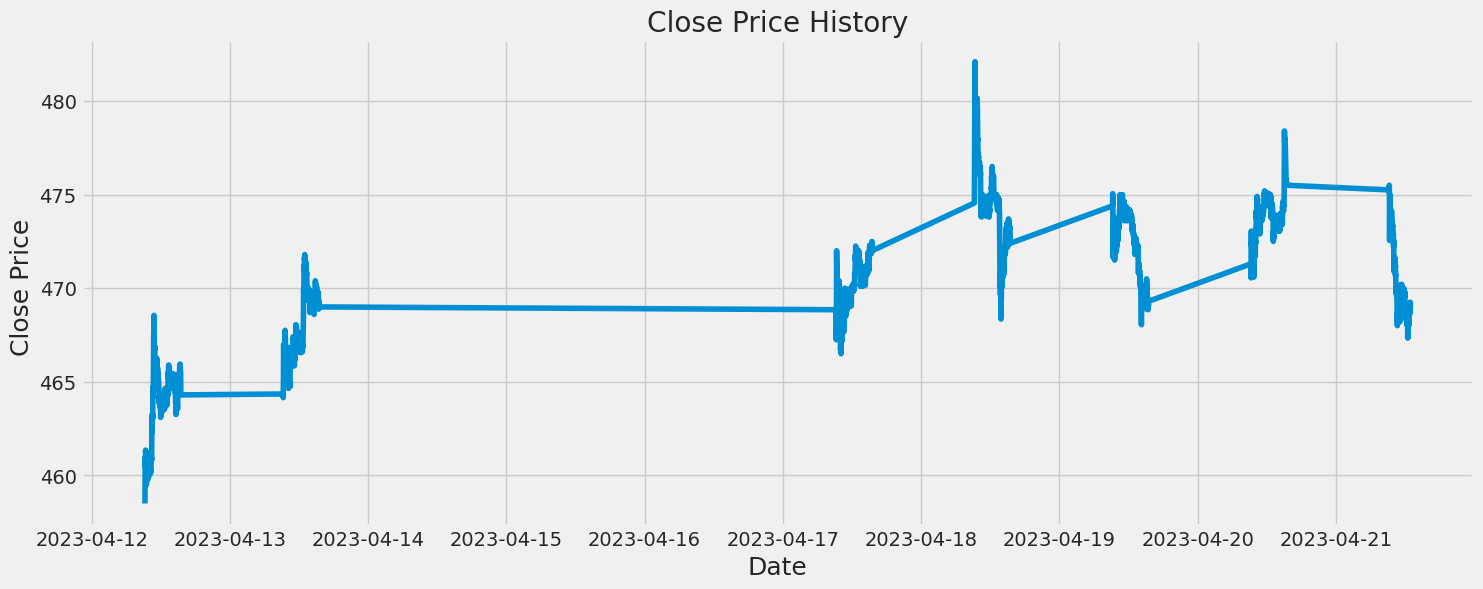

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

##LSTM

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
dataset.shape
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1972

In [ ]:
dataset

array([[458.5       ],
       [459.5       ],
       [460.79998779],
       ...,
       [468.79998779],
       [469.25      ],
       [469.        ]])

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.        ],
       [0.04237287],
       [0.09745708],
       ...,
       [0.43644005],
       [0.45550836],
       [0.44491514]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.04237287, 0.09745708, 0.09745708, 0.10593218,
       0.0805082 , 0.11016972, 0.12076294, 0.11864352, 0.10593218,
       0.09533896, 0.09745708, 0.0805082 , 0.06779685, 0.04237287,
       0.06567743, 0.06779685, 0.06991498, 0.08262761, 0.11440727,
       0.10593218, 0.08686387, 0.08686387, 0.08262761, 0.08262761,
       0.06991498, 0.0720344 , 0.07415252, 0.07415252, 0.06779685,
       0.06355931, 0.05508421, 0.06779685, 0.06991498, 0.07627065,
       0.11016972, 0.11016972, 0.10381405, 0.10169463, 0.1080503 ,
       0.10593218, 0.09110141, 0.09110141, 0.08262761, 0.08262761,
       0.07839007, 0.06567743, 0.06355931, 0.08686387, 0.0805082 ,
       0.08262761, 0.08262761, 0.08262761, 0.07839007, 0.10381405,
       0.09322083, 0.07415252, 0.0805082 , 0.07627065, 0.07627065])]
[0.06991497753208264]

[array([0.        , 0.04237287, 0.09745708, 0.09745708, 0.10593218,
       0.0805082 , 0.11016972, 0.12076294, 0.11864352, 0.10593218,
       0.09533896, 0.09745708, 0.08

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)
# Evaluate the model on the training data
train_acc = model.evaluate(x_train, y_train)

print("Training accuracy:", train_acc)

Epoch 1/5
1912/1912 [==============================] - 20s 7ms/step - loss: 0.0015
Epoch 2/5
1912/1912 [==============================] - 14s 7ms/step - loss: 7.1833e-04
Epoch 3/5
1912/1912 [==============================] - 14s 7ms/step - loss: 4.5648e-04
Epoch 4/5
1912/1912 [==============================] - 14s 7ms/step - loss: 4.0756e-04
Epoch 5/5
60/60 [==============================] - 1s 6ms/step - loss: 2.0540e-04
Training accuracy: 0.00020540061814244837


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

print(x_test)

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictionss)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

Streaming output truncated to the last 5000 lines.
       0.65677949, 0.65677949, 0.65889762, 0.65889762, 0.65677949,
       0.65042382, 0.65677949, 0.65677949, 0.66101704, 0.65889762,
       0.65889762, 0.66101704, 0.66101704, 0.66737271, 0.68220347,
       0.69279669, 0.70127049, 0.69703424, 0.69915236, 0.69915236]), array([0.66101704, 0.65677949, 0.65889762, 0.64406815, 0.65042382,
       0.64618627, 0.64618627, 0.64406815, 0.6398306 , 0.63347493,
       0.61228849, 0.61016908, 0.61440662, 0.62711796, 0.63347493,
       0.63347493, 0.6398306 , 0.6398306 , 0.6483044 , 0.64194873,
       0.65466136, 0.65889762, 0.66949084, 0.65889762, 0.65677949,
       0.65677949, 0.65677949, 0.65677949, 0.65677949, 0.66737271,
       0.67161025, 0.65677949, 0.6398306 , 0.64618627, 0.64618627,
       0.65677949, 0.65889762, 0.65889762, 0.66101704, 0.65677949,
       0.65677949, 0.65889762, 0.65889762, 0.65677949, 0.65042382,
       0.65677949, 0.65677949, 0.66101704, 0.65889762, 0.65889762,
       0.

0.3061637369232318

<ipython-input-30-c41b7c371a74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['lstm_Predictions'] = predictions


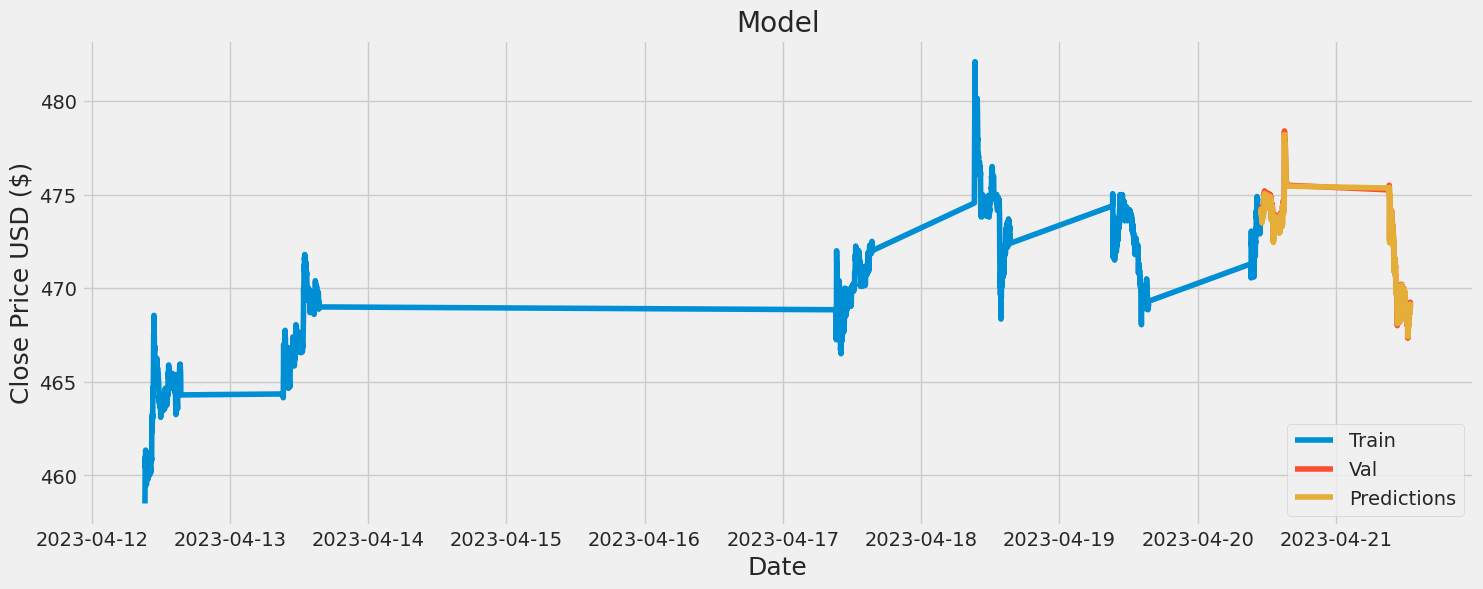

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['lstm_Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'lstm_Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,lstm_Predictions
Datetime,,
2023-04-20 11:00:00+05:30,474.299988,473.936249
2023-04-20 11:01:00+05:30,474.049988,474.189850
2023-04-20 11:02:00+05:30,474.000000,473.914276
2023-04-20 11:03:00+05:30,474.000000,473.880859
2023-04-20 11:04:00+05:30,474.000000,473.884064
...,...,...
2023-04-21 12:53:00+05:30,468.649994,468.699524
2023-04-21 12:54:00+05:30,468.850006,468.663940
2023-04-21 12:55:00+05:30,468.799988,468.847198


##RNN

Epoch 1/5
60/60 [==============================] - 5s 38ms/step - loss: 0.0325
Epoch 2/5
60/60 [==============================] - 2s 37ms/step - loss: 0.0058
Epoch 3/5
60/60 [==============================] - 2s 38ms/step - loss: 0.0051
Epoch 4/5
60/60 [==============================] - 2s 38ms/step - loss: 0.0044
Epoch 5/5
16/16 [==============================] - 0s 10ms/step
Root Mean Squared Error: 0.5089509892038003


<ipython-input-32-b99417c7e199>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['RNN_Predictions'] = predictions


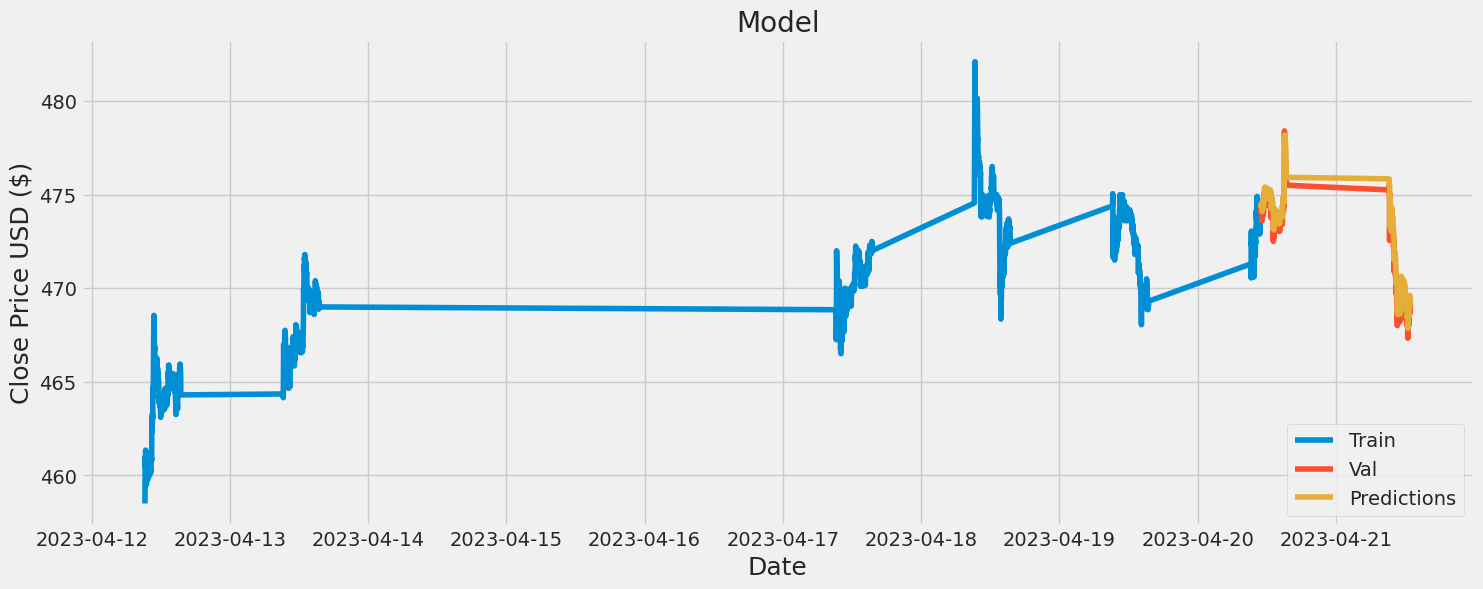

In [ ]:
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Unscale the values
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['RNN_Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'RNN_Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,RNN_Predictions
Datetime,,
2023-04-20 11:00:00+05:30,474.299988,474.302155
2023-04-20 11:01:00+05:30,474.049988,474.459259
2023-04-20 11:02:00+05:30,474.000000,474.497162
2023-04-20 11:03:00+05:30,474.000000,474.404968
2023-04-20 11:04:00+05:30,474.000000,474.379272
...,...,...
2023-04-21 12:53:00+05:30,468.649994,469.282166
2023-04-21 12:54:00+05:30,468.850006,469.094025
2023-04-21 12:55:00+05:30,468.799988,469.128052


##RANDOM FOREST

Root Mean Squared Error: 0.5089509892038003


<ipython-input-34-015c80c46811>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['rf_Predictions'] = predictions


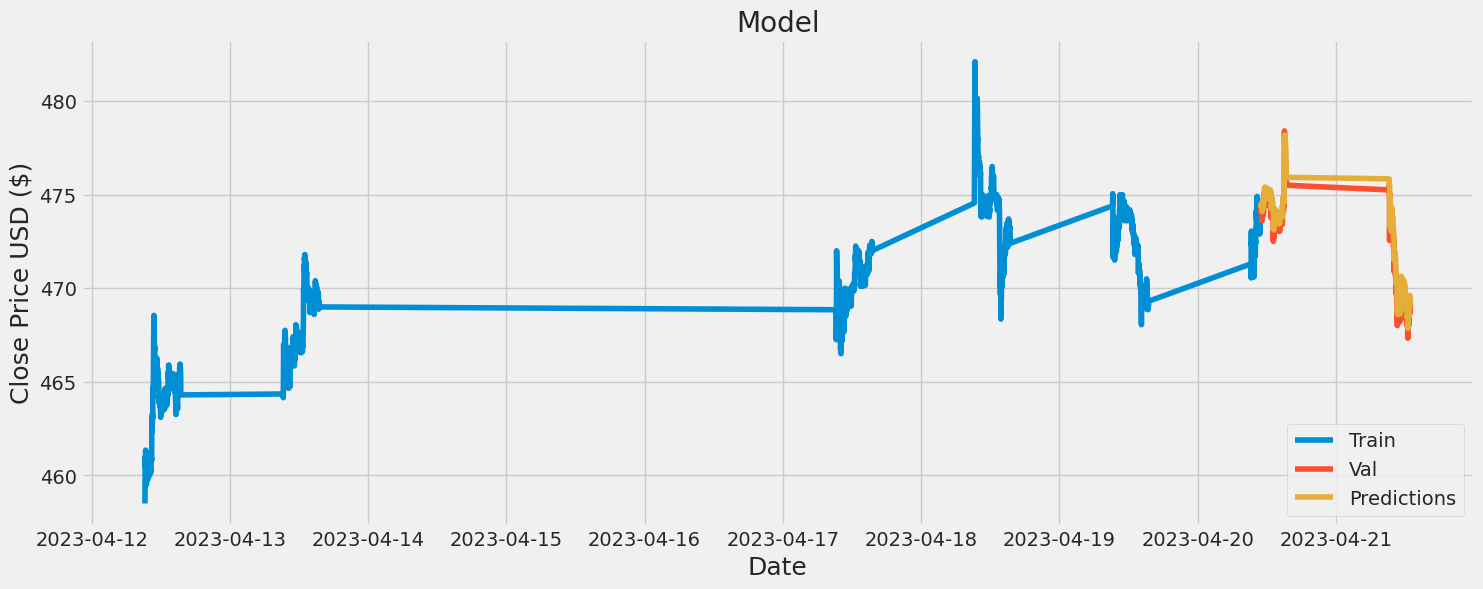

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

x_train_flattened = x_train.reshape(x_train.shape[0], x_train.shape[1]*1)

# Train the model on the training data
rf.fit(x_train_flattened, y_train)


# Get the model's predicted price values
rf.fit(x_train_flattened, y_train)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['rf_Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'rf_Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,rf_Predictions
Datetime,,
2023-04-20 11:00:00+05:30,474.299988,474.302155
2023-04-20 11:01:00+05:30,474.049988,474.459259
2023-04-20 11:02:00+05:30,474.000000,474.497162
2023-04-20 11:03:00+05:30,474.000000,474.404968
2023-04-20 11:04:00+05:30,474.000000,474.379272
...,...,...
2023-04-21 12:53:00+05:30,468.649994,469.282166
2023-04-21 12:54:00+05:30,468.850006,469.094025
2023-04-21 12:55:00+05:30,468.799988,469.128052


##CNN

Epoch 1/10
60/60 [==============================] - 6s 6ms/step - loss: 0.0146
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 8.5121e-04
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 7.6983e-04
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 6.7901e-04
Epoch 10/10
16/16 [==============================] - 0s 5ms/step
Root Mean Squared Error: 0.43657798916976154


<ipython-input-36-40a541a5fcbd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['cnn_Predictions'] = predictions


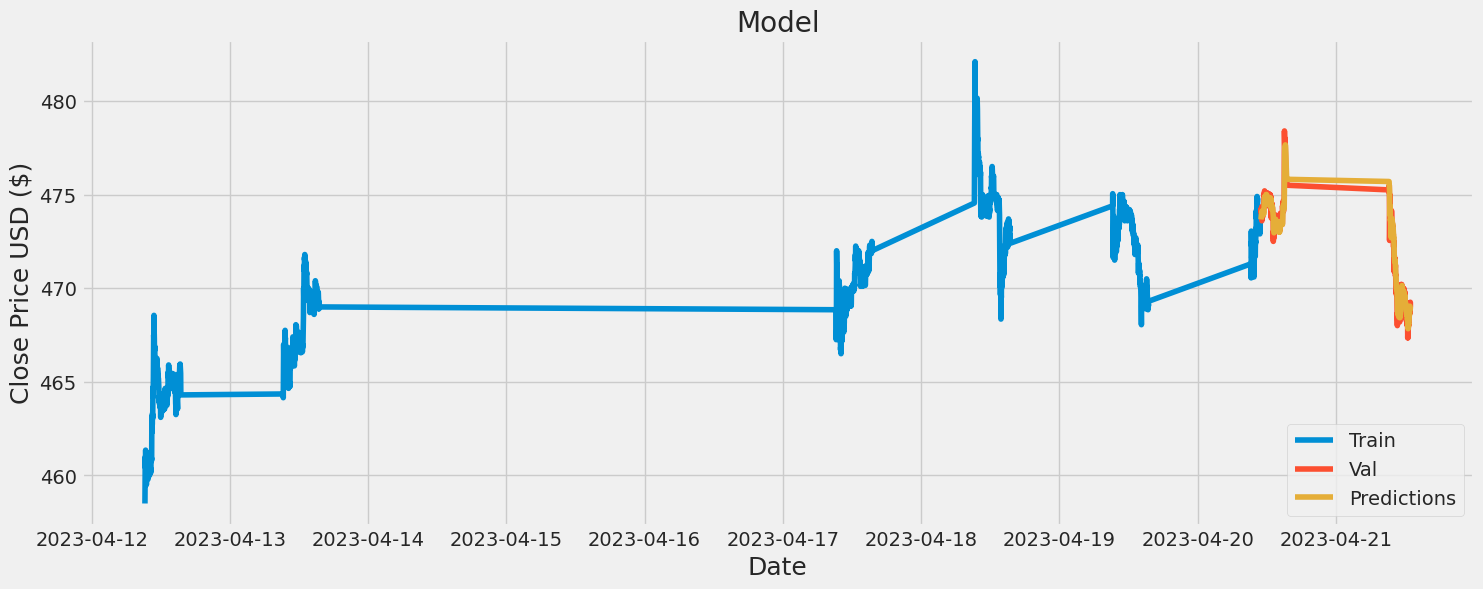

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Define the model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(60, 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(x_train, y_train, batch_size=32, epochs=10)

# Get the model's predicted price values
predictions = cnn_model.predict(x_test)

# Unscale the values
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['cnn_Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'cnn_Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
valid

,Close,cnn_Predictions
Datetime,,
2023-04-20 11:00:00+05:30,474.299988,473.670349
2023-04-20 11:01:00+05:30,474.049988,473.735382
2023-04-20 11:02:00+05:30,474.000000,473.822632
2023-04-20 11:03:00+05:30,474.000000,473.862427
2023-04-20 11:04:00+05:30,474.000000,473.884033
...,...,...
2023-04-21 12:53:00+05:30,468.649994,469.011597
2023-04-21 12:54:00+05:30,468.850006,468.883575
2023-04-21 12:55:00+05:30,468.799988,468.898071


##HYBRID ARIMA-LSTM

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11304.153, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11309.275, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11310.155, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11310.156, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11310.105, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11308.158, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11308.155, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11306.251, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11310.992, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11309.003, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11309.040, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11311.067, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-11308.990, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-11307.067, Time=0.61 sec

Best

<ipython-input-40-8637539b350f>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['ARIMA-LSTM_Predictions'] = predictions


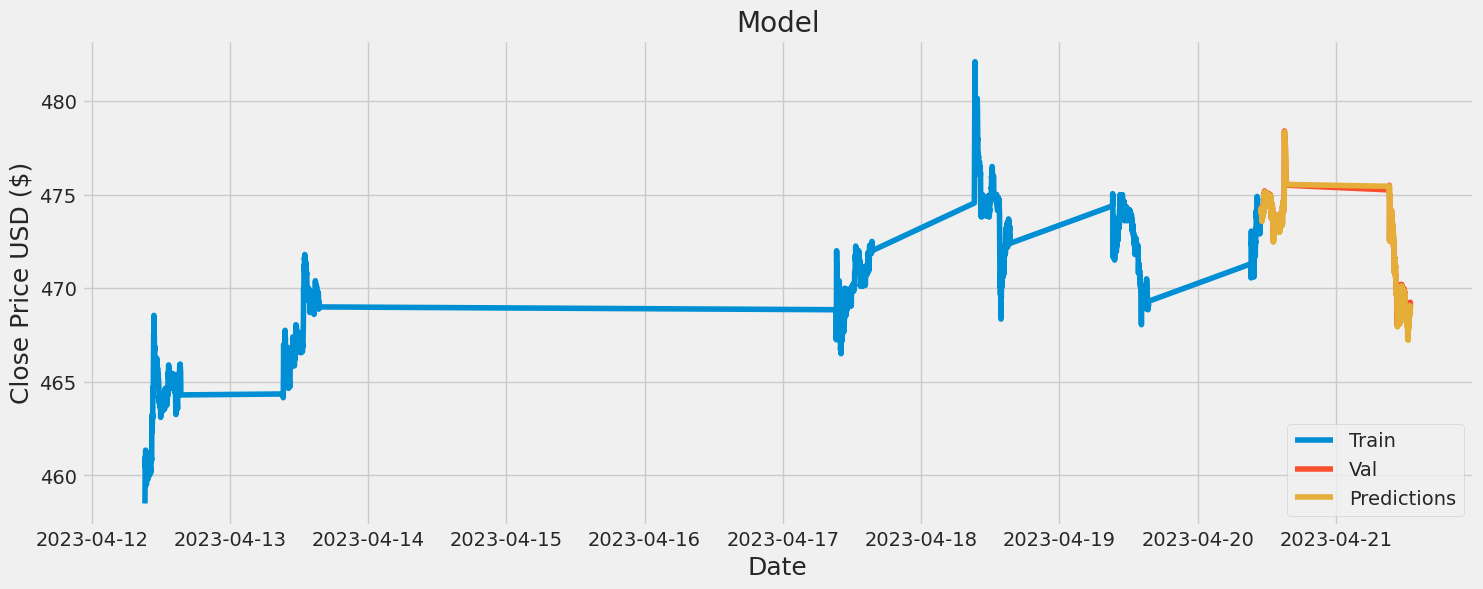

In [ ]:
# Train the model
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Find the optimal values for p, d, and q
model_arima = auto_arima(scaled_data[:training_data_len], trace=True, error_action='ignore', suppress_warnings=True)
print(model_arima.summary())

# Train the model
model_arima_fit = model_arima.fit(scaled_data[:training_data_len])

# Make predictions on the training data using ARIMA
predictions_arima = model_arima_fit.predict(typ='levels')
predictions_arima_scaled = scaler.transform(predictions_arima.reshape(-1, 1))

# Combine the predicted ARIMA values with the original scaled dataset
scaled_data_with_arima = np.concatenate((scaled_data, predictions_arima_scaled), axis=0)

# Create a new training dataset with the predicted ARIMA values
train_data_with_arima = scaled_data_with_arima[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train_with_arima = []
y_train_with_arima = []

for i in range(60, len(train_data_with_arima)):
    x_train_with_arima.append(train_data_with_arima[i-60:i, 0])
    y_train_with_arima.append(train_data_with_arima[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train_with_arima, y_train_with_arima = np.array(x_train_with_arima), np.array(y_train_with_arima)

# Reshape the data
x_train_with_arima = np.reshape(x_train_with_arima, (x_train_with_arima.shape[0], x_train_with_arima.shape[1], 1))
units_lstm_1=128
units_lstm_2=16
dense_units= 25
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=units_lstm_1, return_sequences=True, input_shape=(x_train_with_arima.shape[1], 1)))
model.add(LSTM(units=units_lstm_2, return_sequences=False))
model.add(Dense(units=dense_units))
model.add(Dense(units=dense_units))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(x_train_with_arima, y_train_with_arima, batch_size=1, epochs=10)

# Create the testing data set
# Create a new array containing scaled values from index len(dataset) - 60 to the end
test_data = scaled_data[int(training_data_len)-60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(x_test)

# Unscale the predictions
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE score:", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['ARIMA-LSTM_Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'ARIMA-LSTM_Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define a function that creates the ARIMA-LSTM model with the specified hyperparameters
def create_model(units_lstm_1=128, units_lstm_2=64, dense_units=25):
    model = Sequential()
    model.add(LSTM(units=units_lstm_1, return_sequences=True, input_shape=(x_train_with_arima.shape[1], 1)))
    model.add(LSTM(units=units_lstm_2, return_sequences=False))
    model.add(Dense(units=dense_units))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor wrapper around the create_model function
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter grid to search over
param_grid = {'units_lstm_1': [32, 64, 128], 'units_lstm_2': [16, 32, 64], 'dense_units': [10, 25, 50]}

# Create a GridSearchCV object with the defined hyperparameter grid and the KerasRegressor model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_with_arima, y_train_with_arima)

# Print the best hyperparameters and the corresponding RMSE score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))


<ipython-input-39-a6eb577c6abf>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


KeyboardInterrupt: ignored

In [ ]:
valid

##PARALLEL PROCESSING EXAMPLE

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from joblib import Parallel, delayed
from datetime import datetime


# Define a function to download stock data from Yahoo Finance
def download_data(ticker):
    data = yf.download(ticker, start='2010-01-01', end = datetime.now() )  # Download data for an additional day
    return data

# Define a function to preprocess the data
def preprocess_data(data):
    data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data.dropna(inplace=True)
    return data

# Define a function to train LSTM model
def train_model(data):
    # Prepare training data
    X = data['Returns'].values[:-1]
    y = data['Returns'].values[1:]
    X = X.reshape(-1, 1, 1)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (X.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X, y, epochs=1, verbose=0)

    # Make predictions
    last_return = data['Returns'].values[-1]
    next_return = model.predict(np.array([[last_return]]))[0][0]
    next_price = data['Adj Close'].values[-1] * np.exp(next_return)

    return next_price


# Define a function to run the whole pipeline for a given ticker
def predict_next_price(ticker):
    # Download data
    data = download_data(ticker)

    # Preprocess data
    data = preprocess_data(data)

    # Train model and predict next price
    next_price_predicted = train_model(data)

    # Get the actual next price
    next_price_actual = data['Adj Close'][-1]

    return (ticker, next_price_predicted, next_price_actual)

# Define the tickers to be used
tickers = ['TATAMOTORS.NS', 'M&M.NS', 'MARUTI.NS', 'EICHERMOT.NS']

# Use parallel processing to predict next prices for all tickers
results = Parallel(n_jobs=-1)(delayed(predict_next_price)(ticker) for ticker in tickers)

# Print the results and accuracy score
total_error = 0
for result in results:
    ticker = result[0]
    next_price_predicted = result[1]
    next_price_actual = result[2]
    error = abs(next_price_predicted - next_price_actual) / next_price_actual
    total_error += error
    print(f"Next price of {ticker}: Predicted = {next_price_predicted:.2f}, Actual = {next_price_actual:.2f}")



In [ ]:
 #Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

[*********************100%***********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11589.882, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11590.915, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11590.915, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11590.595, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11588.917, Time=4.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11588.916, Time=4.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11587.036, Time=1.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11591.645, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11589.655, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11589.693, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11591.721, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-11589.643, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-11587.721, Time=1.06 sec

Bes

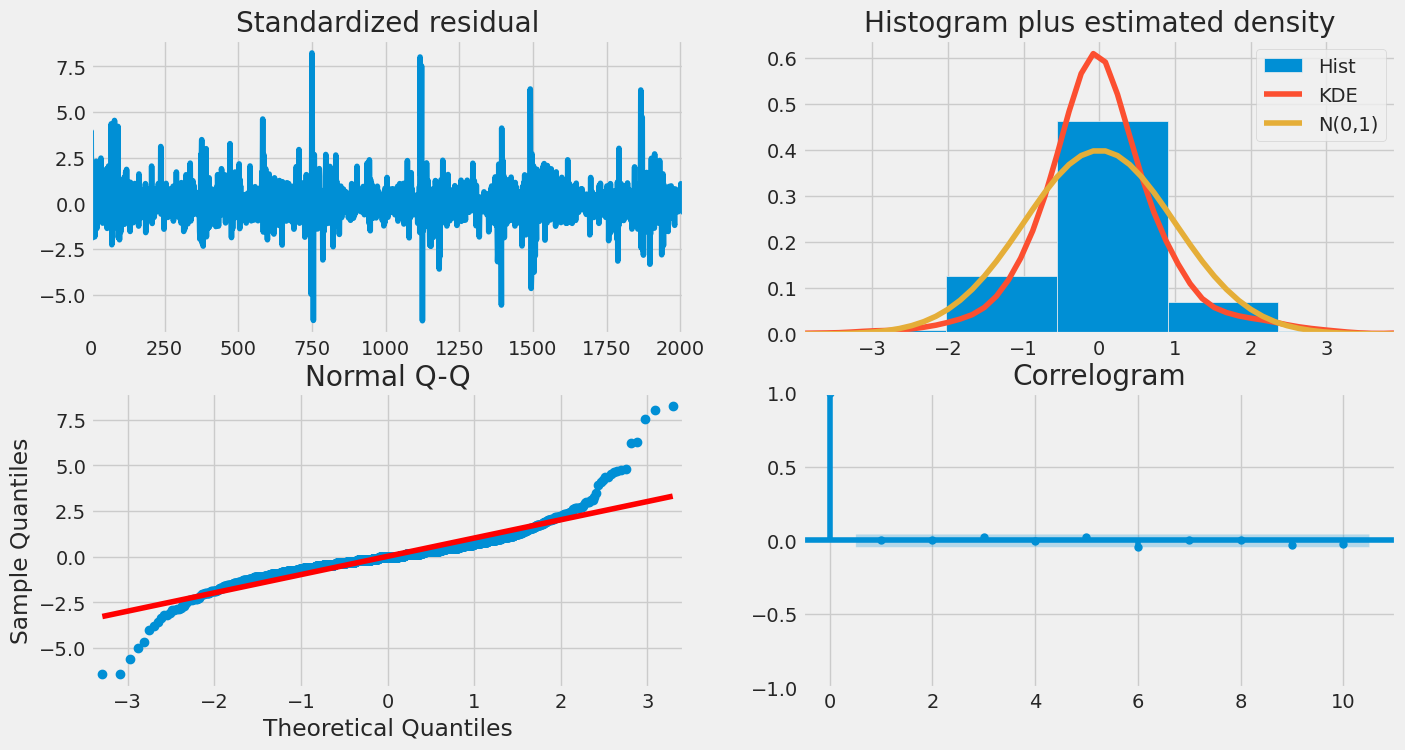

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2015
Model:                 ARIMA(1, 1, 2)   Log Likelihood                5797.877
Date:                Fri, 21 Apr 2023   AIC                         -11587.753
Time:                        08:21:30   BIC                         -11565.322
Sample:                             0   HQIC                        -11579.520
                               - 2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2612      4.620     -0.057      0.955      -9.316       8.793
ma.L1          0.2977      4.617      0.064      0.949      -8.752       9.347
ma.L2          0.0073      0.173      0.042      0.9

ValueError: ignored

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima
# Get the stock quote
df = pdr.get_data_yahoo('TATAMOTORS.NS',  period = '7d', interval = '1m')
# Show the data
df
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
dataset.shape
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .80))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into training and validation sets
train_data = scaled_data[:training_data_len]
valid_data = scaled_data[training_data_len:]

# Fit ARIMA model to the training data
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()
model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
fitted = model.fit()
print(fitted.summary())
# Forecast
fc = fitted.forecast(321, alpha=0.20)  # 95% conf
conf = fc
se = fc
predictions_arima = scaler.inverse_transform(fc.reshape(-1, 1))
# Evaluate the model
rmse = np.sqrt(mean_squared_error(data[training_data_len:].values, predictions_arima))
print("RMSE score (ARIMA):", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['ARIMA_Predictions'] = predictions_arima
# Make as pandas series
fc_series = pd.Series(fc, index=valid.index)
lower_series = pd.Series(conf[:, 0], index=valid.index)
upper_series = pd.Series(conf[:, 1], index=valid.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(valid_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()



[*********************100%***********************]  1 of 1 completed
Epoch 1/20
2027/2027 - 16s - loss: 0.0020 - 16s/epoch - 8ms/step
Epoch 2/20
2027/2027 - 8s - loss: 1.0855e-05 - 8s/epoch - 4ms/step
Epoch 3/20
2027/2027 - 8s - loss: 2.9348e-05 - 8s/epoch - 4ms/step
Epoch 4/20
2027/2027 - 8s - loss: 3.7293e-05 - 8s/epoch - 4ms/step
Epoch 5/20
2027/2027 - 8s - loss: 3.1840e-05 - 8s/epoch - 4ms/step
Epoch 6/20
2027/2027 - 8s - loss: 3.0263e-05 - 8s/epoch - 4ms/step
Epoch 7/20
2027/2027 - 8s - loss: 2.6855e-05 - 8s/epoch - 4ms/step
Epoch 8/20
2027/2027 - 8s - loss: 5.7340e-05 - 8s/epoch - 4ms/step
Epoch 9/20
2027/2027 - 8s - loss: 1.6437e-05 - 8s/epoch - 4ms/step
Epoch 10/20
2027/2027 - 8s - loss: 5.3483e-05 - 8s/epoch - 4ms/step
Epoch 11/20
2027/2027 - 8s - loss: 2.7070e-05 - 8s/epoch - 4ms/step
Epoch 12/20
2027/2027 - 8s - loss: 2.7203e-05 - 8s/epoch - 4ms/step
Epoch 13/20
2027/2027 - 9s - loss: 2.1136e-05 - 9s/epoch - 5ms/step
Epoch 14/20
2027/2027 - 8s - loss: 2.3045e-05 - 8s/epoch -

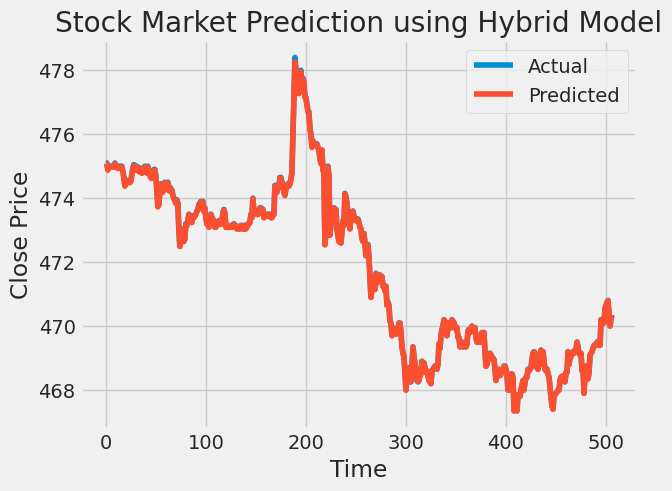

RMSE Score: 0.023381958147112823
Predictions:
[[475.0759346 ]
 [475.0759346 ]
 [474.87340225]
 [474.97229115]
 [474.97229115]
 [474.97229115]
 [474.97229115]
 [474.97229115]
 [474.97229115]
 [475.0759346 ]
 [474.97229115]
 [474.97229115]
 [474.9237526 ]
 [474.97229115]
 [474.97229115]
 [474.9237526 ]
 [474.97229115]
 [474.82157209]
 [474.62498152]
 [474.37100444]
 [474.42850067]
 [474.52326381]
 [474.52326381]
 [474.52326381]
 [474.48126205]
 [474.52326381]
 [474.72463846]
 [474.9237526 ]
 [475.0198366 ]
 [474.87340225]
 [474.87340225]
 [474.97229115]
 [474.87340225]
 [474.82157209]
 [474.9237526 ]
 [474.82157209]
 [474.77414903]
 [474.82157209]
 [474.9237526 ]
 [474.97229115]
 [474.9237526 ]
 [474.77414903]
 [474.97229115]
 [474.82157209]
 [474.72463846]
 [474.62498152]
 [474.6754233 ]
 [474.62498152]
 [474.87340225]
 [474.87340225]
 [474.6754233 ]
 [474.22826542]
 [473.72672146]
 [473.78468329]
 [474.22826542]
 [474.42850067]
 [474.32805318]
 [474.17892366]
 [474.42850067]
 [474.4812

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Downloading the data from Yahoo Finance API
data = yf.download('TATAMOTORS.NS',  period = '7d', interval = '1m')

# Preprocessing the data
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Defining the hybrid model
def arima_lstm_xgb(train_data, test_data):
    # Fitting the ARIMA model
    model_arima = ARIMA(train_data, order=(5, 1, 1))
    model_arima_fit = model_arima.fit()

    # Fitting the LSTM model
    train_data_lstm = train_data.reshape(-1, 1, 1)
    test_data_lstm = test_data.reshape(-1, 1, 1)
    lstm_model = Sequential()
    lstm_model.add(LSTM(128, return_sequences=True, input_shape=(1,1)))
    lstm_model.add(LSTM(64, return_sequences=False))
    lstm_model.add(Dense(25))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mse')
    lstm_model.fit(train_data_lstm, train_data_lstm, epochs=20, batch_size=1, verbose=2)

    # Fitting the XGBoost model
    train_data_xgb = train_data.reshape(-1, 1)
    test_data_xgb = test_data.reshape(-1, 1)
    xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
    xgb_model.fit(train_data_xgb, train_data_xgb)

    # Making predictions using the hybrid model
    predictions = []
    for i in range(len(test_data)):
        arima_prediction = model_arima_fit.forecast()[0]
        lstm_prediction = lstm_model.predict(test_data_lstm[i].reshape(1, 1, 1))[0][0]
        xgb_prediction = xgb_model.predict(np.array([test_data_xgb[i]]))[0]
        prediction = (lstm_prediction + xgb_prediction) / 2
        predictions.append(prediction)
        train_data = np.append(train_data, test_data[i])
        train_data_lstm = np.append(train_data_lstm, test_data_lstm[i].reshape(-1, 1, 1), axis=0)
        train_data_xgb = np.append(train_data_xgb, test_data_xgb[i])

    # Scaling back the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Calculating the RMSE score
    rmse_score = np.sqrt(mean_squared_error(scaler.inverse_transform(test_data), predictions))


    # Plotting the predictions
    plt.plot(scaler.inverse_transform(test_data), label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title('Stock Market Prediction using Hybrid Model')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    return predictions, rmse_score

#Calling the hybrid model function
predictions, rmse_score = arima_lstm_xgb(train_data, test_data)

#Printing the RMSE score
print('RMSE Score:', rmse_score)

#Printing the predicted values
print('Predictions:')
print(predictions)
